# Plots of BGCs

This Notebook will prepare figures describing the set of BGCs obtained from endolichenic fungi recovered from New Zealand lichens.

A cosine analysis will also be prepared from data generated by BiG-SLiCE. This analysis returns distances that are less weighted by the number of features, so BGCs with fewer features like RiPPs and terpenes. More information regarding this can be found in the Supplementary Information of the wonderful paper by [Paoli et al., 2022](https://www.nature.com/articles/s41586-022-04862-3#MOESM1). The cosine analysis in this Notebook was written, with minor alterations, by Dr Peng Hou.

## plot antiSMASH BGCs by type

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from collections import defaultdict
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv("../ELF_master_results.csv")
df = df.sort_values(by=["BGC_count"], ascending=False)
#df = df[df["isolate_order"] != "unidentified"]
df2 = pd.read_csv("ELF_all_bgcs.csv")
df2["Assembly"] = df2["file"].str.split(".").str[0]
df2["BGC_type"] = df2["BGC_type"].str.replace('[\[\]\']', '')
df2["BGC_length2"] = df2["BGC_length"].div(1000)
df["isolate_order"] =df["isolate_order"].replace('Sordariomycetes incertae sedis', 'Sordariomycetes i.s.')
df["isolate_order"] =df["isolate_order"].replace('Leotiomycetes incertae sedis', 'Leotiomycetes i.s.')
df2["order"] =df2["order"].replace('Sordariomycetes incertae sedis', 'Sordariomycetes i.s.')
df2["order"] =df2["order"].replace('Leotiomycetes incertae sedis', 'Leotiomycetes i.s.')

df2.head()

C:\Users\styleske\AppData\Local\Temp\ipykernel_9468\1826906408.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["BGC_type"] = df2["BGC_type"].str.replace('[\[\]\']', '')


,file,contig,partial,BGC_type,chem_class,BGC_location,BGC_length,protocluster,kind,cblast_type,...,kc_core_bonus,assembly,class,order,family,genus,Unnamed: 27,Unnamed: 28,Assembly,BGC_length2
0,130.json,scaffold_1,True,NRPS,NRP,0:25880,25880,1,single,"NRPS,terpene",...,0,130,Eurotiomycetes,Eurotiales,Aspergillaceae,Penicillium,NaN,130_scaffold_1,130,25.880
1,130.json,scaffold_5,True,NRPS-like,NRP,0:20667,20667,1,single,NRPS-like,...,0,130,Eurotiomycetes,Eurotiales,Aspergillaceae,Penicillium,NaN,130_scaffold_5,130,20.667
2,130.json,scaffold_10,True,T1PKS,Polyketide,0:19733,19733,1,single,T1PKS,...,0,130,Eurotiomycetes,Eurotiales,Aspergillaceae,Penicillium,NaN,130_scaffold_10,130,19.733
3,130.json,scaffold_15,True,NRPS,NRP,0:18816,18816,1,single,NaN,...,3,130,Eurotiomycetes,Eurotiales,Aspergillaceae,Penicillium,NaN,130_scaffold_15,130,18.816
4,130.json,scaffold_28,True,NRPS,NRP,0:16838,16838,1,single,NRPS,...,0,130,Eurotiomycetes,Eurotiales,Aspergillaceae,Penicillium,NaN,130_scaffold_28,130,16.838


In [4]:
# order the dataframes
order = df.groupby("isolate_order")["BGC_count"].mean().sort_values(ascending=False).index
order2 = order[0:-2] # get order without the Classes containing no BGCs

# subset data for chemical class and fungal Order
xxx = df2[["chem_class","order"]]
#xxx = xxx[xxx["order"] != "unidentified"]

# prepare contingency table of BGCs for each fungal Order then append
# empty rows for the Orders with the Orders removed above
xx = pd.crosstab(xxx['order'], xxx['chem_class']).loc[order2]
row1 = pd.DataFrame(index=['Cladosporiales'], columns=xx.columns)
row2 = pd.DataFrame(index=['Saccharomycetales'], columns=xx.columns)

# Concatenate the empty DataFrames with the original DataFrame
xx = pd.concat([xx, row1, row2], ignore_index=False)
xx = xx[["NRP", "Polyketide", "Hybrid", "Terpene", "Other", "RiPP"]]
xx

chem_class,NRP,Polyketide,Hybrid,Terpene,Other,RiPP
Coniochaetales,51,81,11,30,0,0
Eurotiales,468,397,90,59,28,1
Xylariales,485,733,59,108,43,3
Mycosphaerellales,27,12,4,0,0,0
Glomerellales,29,21,6,5,1,1
Hypocreales,701,476,88,81,10,3
Pleosporales,163,201,27,62,8,0
Sordariomycetes i.s.,16,8,3,0,1,1
Leotiomycetes i.s.,19,33,3,2,0,0
Sordariales,115,145,17,43,10,2


In [4]:
# function to categorize coverage data
def cov(x):
    if x < 10:
        return "0-9"
    elif x < 20:
        return "11-20"
    elif x < 30:
        return "21-30"
    elif x < 40:
        return "31-40"
    elif x < 50:
        return "41-50"
    elif x < 60:
        return "51-60"
    elif x < 70:
        return "61-70"
    elif x >= 80:
        return "71-80"
    elif x >= 90:
        return "81-90"
    elif x >= 100:
        return "91-100"
    else:
        return "100+"
df10 = df        

# function to categorize BGC length data
def cat(x):
    if x < 0.1:
        return "<0.1"
    elif x < 0.5:
        return "0.1-0.5"
    elif x < 1:
        return "0.5-1"
    elif x < 1.5:
        return "1-1.5"
    elif x < 2:
        return "1.5-2"
    elif x < 2.5:
        return "2-2.5"
    elif x < 3:
        return "2.5-3"
    elif x >= 3:
        return ">3"
    else:
        return "<0.1"

df["coverage_brac"] = df["estimated_coverage"].apply(lambda x: cov(x))
df["BGC total length (Mbp)"] = df["total_BGC_length"].div(1000000).apply(lambda x: cat(x))
df["assembly length (Mbp)"] = df["Total length"].div(1000000)
df["BGC total length (Mbp)"] = df["BGC total length (Mbp)"].fillna(0)

C:\Users\styleske\AppData\Local\Temp\ipykernel_15080\971566841.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axd["swarm"].set_xticklabels(xlabels1, rotation=45, ha='right', rotation_mode='anchor')


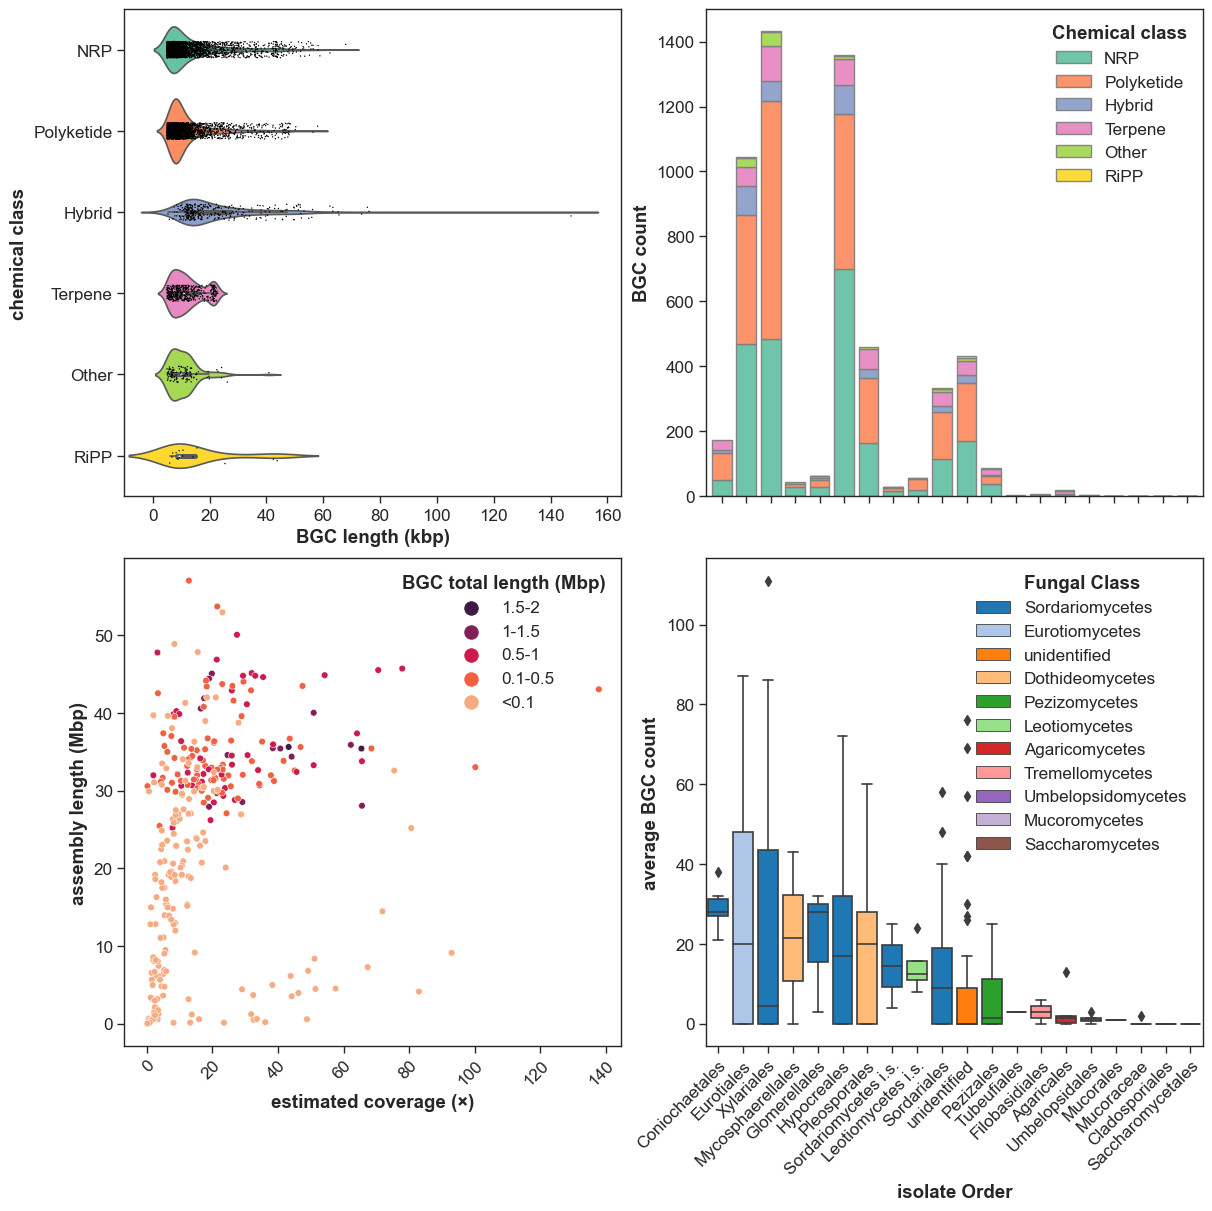

In [258]:
sns.set_palette('tab20')
sns.set_style(style='white')
sns.set_context("paper", font_scale=1.4)

fig, axd = plt.subplot_mosaic([['violin', 'bar'], ['swarm', 'box']],
    figsize=(12, 12), layout="constrained")

cmap = sns.color_palette("Set2")

# plots
sns.violinplot(data=df2, \
    x=df2["BGC_length2"], y=df2["chem_class"], ax=axd["violin"], palette=cmap, scale="area", saturation=1)
sns.stripplot(data=df2, x=df2["BGC_length2"], y=df2["chem_class"], ax=axd["violin"], \
    color="black", size=1)
xx.plot(kind='bar', stacked=True, ax=axd["bar"], \
    color=cmap, width=0.8, edgecolor="grey", linewidth=1, alpha=0.95)
sns.boxplot(x=df["isolate_order"], y=df["BGC_count"], ax=axd["box"], \
    palette="tab20", dodge=False, hue=df["isolate_class"], order=order, saturation=1)
swarm_order = ["0-9","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","100+"]
hue_order = ['1.5-2', '1-1.5', '0.5-1', '0.1-0.5', '<0.1']
sns.scatterplot(data=df, y=df['assembly length (Mbp)'], x=df["estimated_coverage"], \
    ax=axd["swarm"], hue=df['BGC total length (Mbp)'], hue_order=hue_order, palette="rocket")

# formatting for each plot
axd["violin"].set_xlim(-10,)
axd["violin"].set_ylabel("chemical class", fontproperties={'weight':"bold"})
axd["violin"].set_xlabel("BGC length (kbp)", fontproperties={'weight':"bold"})

axd["bar"].set_ylim(0,1500)
axd["bar"].set_ylabel("BGC count", fontproperties={'weight':"bold"})
axd["bar"].legend(frameon=False, title="Chemical class", title_fontproperties={'weight':"bold"})
axd["bar"].set_xticklabels([])
axd["bar"].set_xlabel("")

axd["swarm"].set_ylabel("assembly length (Mbp)", fontproperties={'weight':"bold"})
axd["swarm"].set_xlabel("estimated coverage (×)", fontproperties={'weight':"bold"})
axd["swarm"].legend(frameon=False, loc='best', title="BGC total length (Mbp)", title_fontproperties={'weight':"bold"},  markerscale=2)
xlabels1 = axd["swarm"].get_xticklabels()
axd["swarm"].set_xticklabels(xlabels1, rotation=45, ha='right', rotation_mode='anchor')

axd["box"].set_ylabel("average BGC count", fontproperties={'weight':"bold"})
axd["box"].set_xlabel("isolate Order", fontproperties={'weight':"bold"})
axd["box"].legend(frameon=False, loc='best', title="Fungal Class", title_fontproperties={'weight':"bold"}, markerscale=1)
xlabels2 = axd["box"].get_xticklabels()
axd["box"].set_xticklabels(xlabels2, rotation=45, ha='right', rotation_mode='anchor')


for ax in axd.values():
    ax.tick_params(axis='both', which='both', left=True, bottom=True, labelbottom=True)

plt.savefig("BGC_multiplot.svg", format="svg", bbox_inches='tight')
plt.show()

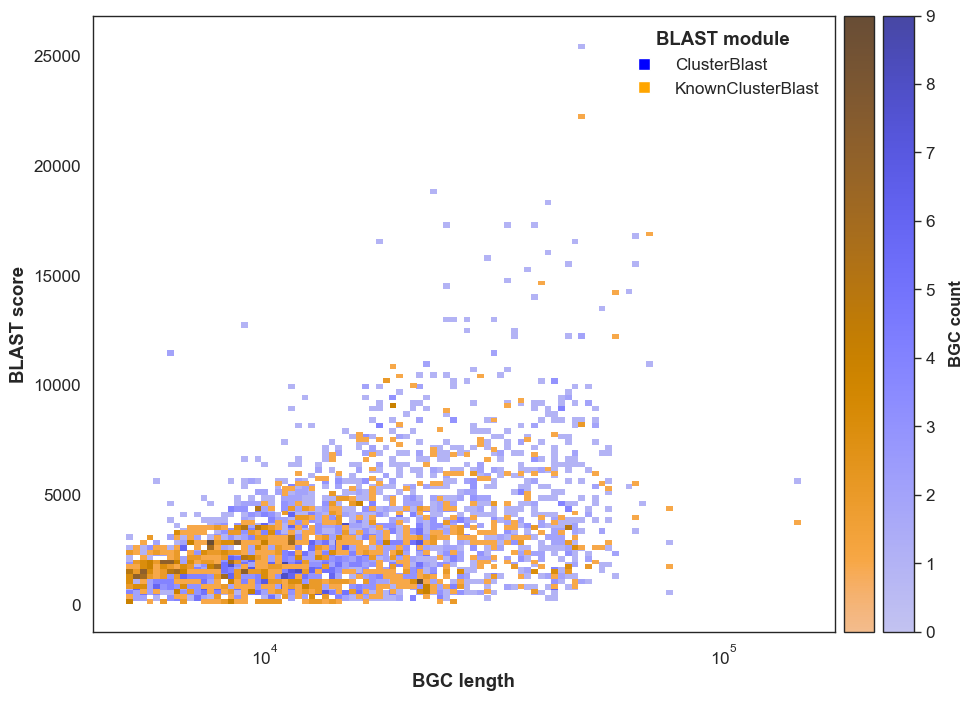

In [256]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette('tab10')
sns.set_style(style='white')
sns.set_context("paper", font_scale=1.4)

ax = sns.histplot(x=df2["BGC_length"], y=df2["cblast_score"], color='blue', bins=100, label="ClusterBlast", log_scale=(True, False), cbar=True, cbar_kws={"pad": -0.1})
ax = sns.histplot(x=df2["BGC_length"], y=df2["kc_blast_score"], color='orange', bins=100, label='KnownClusterBlast', log_scale=(True, False), cbar=True, cbar_kws={"pad": 0.01})

handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8),
           Line2D([0], [0], marker='s', color='w', markerfacecolor='orange', markersize=8)]
ax.legend(handles, ["ClusterBlast", "KnownClusterBlast"], frameon=False, loc='upper right', title="BLAST module", title_fontproperties={'weight':"bold"})
ax.set_ylabel("BLAST score", fontproperties={'weight':"bold"})
ax.set_xlabel("BGC length", fontproperties={'weight':"bold"})

# Set the label properties of the colorbar
colorbar2 = ax.collections[0].colorbar
colorbar2.set_label("BGC count", fontsize=12, labelpad=10, weight="bold")
colorbar1 = ax.collections[1].colorbar
colorbar1.set_ticks([])
for ax in axd.values():
    ax.tick_params(axis='both', which='both', left=True, bottom=True, labelbottom=True)

plt.savefig("module_blast.svg", format="svg", bbox_inches='tight')
plt.show()

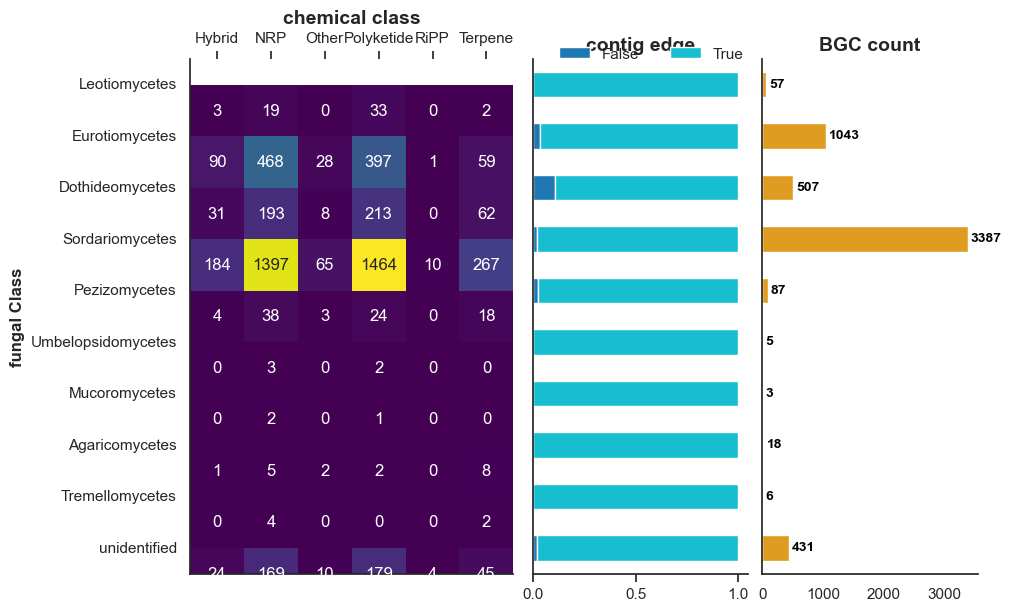

In [111]:
sns.reset_defaults()
sns.set_palette('tab10')
sns.set_style(style='white')
sns.set_context("notebook")

# prep data
matrix = df2.pivot_table(index='class', columns='chem_class', aggfunc='size', fill_value=0)
class_partial = df2[["class","partial"]]
cross_tab = pd.crosstab(index=class_partial['class'],
                        columns=class_partial['partial'])
cross_tab_prop = pd.crosstab(index=class_partial['class'],
                        columns=class_partial['partial'], normalize="index")
                        
# reorder index for phylogenetic tree
custom_order = {"Leotiomycetes": 1, "Eurotiomycetes": 2, "Dothideomycetes": 3,
                "Sordariomycetes": 4, "Pezizomycetes": 5, "Umbelopsidomycetes": 6, "Mucoromycetes": 7,
                "Agaricomycetes": 8, "Tremellomycetes": 9, "unidentified":10}
matrix = matrix.sort_index(key=lambda x: x.map(custom_order))
df2 = df2.sort_values(by="class", key=lambda x: x.map(custom_order))
cross_tab_prop = cross_tab_prop.sort_index(key=lambda x: x.map(custom_order))

fig, axes = plt.subplots(ncols = 3, sharey = True, gridspec_kw = {'width_ratios': [30, 20, 20]}, layout="constrained", figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='viridis', cbar=False, ax=axes[0], fmt='d')
axes[0].xaxis.tick_top()
axes[0].set_ylim(len(matrix)-0.5, -0.5)
axes[0].set(ylabel="fungal Class", title="chemical class", xlabel=None)
cross_tab_prop.plot(kind='barh', stacked=True, colormap='tab10', ax=axes[1])
axes[1].tick_params(bottom=True)
axes[1].set(ylabel=None, xlabel=None, title="contig edge")
axes[1].legend(frameon=False, loc='upper center', ncols=2, title_fontproperties={'weight':"bold"}, bbox_to_anchor=(0.55, 1.05))
sns.countplot(df2, y="class", color="orange", ax=axes[2], width=0.5)
axes[2].set(ylabel=None, xlabel=None, title="BGC count")
for ax in axes.flat:
    ax.set_title(ax.get_title(), weight='bold', fontsize=14)
    ax.title.set_position([0.5, 1.1])
    ax.yaxis.label.set_weight('bold')

# add BGC counts to barplot
class_counts = df2['class'].value_counts()
class_counts = class_counts.sort_index(key=lambda x: x.map(custom_order))
for index, val in enumerate([*class_counts.index.values]):
    axes[2].text(x=class_counts[index]+50, y=index+0.05, \
                 s=f'{class_counts[index]}', color="black", fontsize=10, fontweight="bold")

sns.despine()
plt.savefig("BGC_count_by_class.svg", format="svg", bbox_inches='tight')
plt.show()

In [5]:
mibig_bgcs = df2["kc_desc"].value_counts()
display(mibig_bgcs)
mibig_bgcs.to_csv("mibig_counts.csv")

dimethylcoprogen                   88
squalestatin S1                    56
naphthopyrone                      47
1,3,6,8-tetrahydroxynaphthalene    41
clavaric acid                      39
                                   ..
APE Ec                              1
chrysogine                          1
gibepyrone-A                        1
oxyjavanicin                        1
ochrindole A                        1
Name: kc_desc, Length: 139, dtype: int64